<a href="https://colab.research.google.com/github/JyotiChiluka/Face-Emotion-Recognition/blob/main/Face_Emotion_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Face Emotion Recognition**

#**Mounting drive,importing libraries and reading dataset**

In [ ]:
#Mounting to drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Importing libraries
import numpy as np 
import pandas as pd 
import cv2

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Capstone Projects/fer2013/fer2013.csv')

In [ ]:
#It gives first five rows of dataset 
df.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [ ]:
#Length of a pixels # 48 * 48
len(df.iloc[0]['pixels'].split())

2304

In [ ]:
#Labelling of emotion
label_map = ['Anger', 'Neutral', 'Fear', 'Happy', 'Sad', 'Surprise']

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
img = df.iloc[0]['pixels'].split()

In [ ]:
img = [int(i) for i in img]

In [ ]:
type(img[0])

int

In [ ]:
len(img)

2304

In [ ]:
img = np.array(img)
img

array([ 70,  80,  82, ..., 106, 109,  82])

In [ ]:
img = img.reshape(48,48)

In [ ]:
img.shape

(48, 48)

Text(0.5, 0, '0')

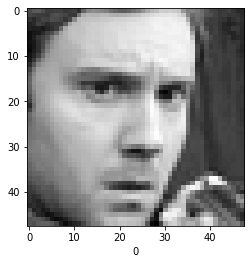

In [ ]:
#Plotting a image 
plt.imshow(img, cmap='gray')
plt.xlabel(df.iloc[0]['emotion'])

In [ ]:
X = []
y = []

#**Setting labels for different emotions**

In [ ]:
#Setting different labels to different emotion
def getData(path):
    anger = 0
    fear = 0
    sad = 0
    happy = 0
    surprise = 0
    neutral = 0
    df = pd.read_csv(path)
    
    X = []
    y = []    
    
    for i in range(len(df)):
        if df.iloc[i]['emotion'] != 1:
            if df.iloc[i]['emotion'] == 0:
                if anger <= 4000:            
                    y.append(df.iloc[i]['emotion'])
                    im = df.iloc[i]['pixels']
                    im = [int(x) for x in im.split()]
                    X.append(im)
                    anger += 1
                else:
                    pass
                
            if df.iloc[i]['emotion'] == 2:
                if fear <= 4000:            
                    y.append(df.iloc[i]['emotion'])
                    im = df.iloc[i]['pixels']
                    im = [int(x) for x in im.split()]
                    X.append(im)
                    fear += 1
                else:
                    pass
                
            if df.iloc[i]['emotion'] == 3:
                if happy <= 4000:            
                    y.append(df.iloc[i]['emotion'])
                    im = df.iloc[i]['pixels']
                    im = [int(x) for x in im.split()]
                    X.append(im)
                    happy += 1
                else:
                    pass
                
            if df.iloc[i]['emotion'] == 4:
                if sad <= 4000:            
                    y.append(df.iloc[i]['emotion'])
                    im = df.iloc[i]['pixels']
                    im = [int(x) for x in im.split()]
                    X.append(im)
                    sad += 1
                else:
                    pass
                
            if df.iloc[i]['emotion'] == 5:
                if surprise <= 4000:            
                    y.append(df.iloc[i]['emotion'])
                    im = df.iloc[i]['pixels']
                    im = [int(x) for x in im.split()]
                    X.append(im)
                    surprise += 1
                else:
                    pass
                
            if df.iloc[i]['emotion'] == 6:
                if neutral <= 4000:            
                    y.append(df.iloc[i]['emotion'])
                    im = df.iloc[i]['pixels']
                    im = [int(x) for x in im.split()]
                    X.append(im)
                    neutral += 1
                else:
                    pass

            
            
    return X, y  
    

In [ ]:
#Generating new dataset
X, y = getData('/content/drive/MyDrive/Capstone Projects/fer2013/fer2013.csv')

In [ ]:
np.unique(y, return_counts=True)

(array([0, 2, 3, 4, 5, 6]), array([4001, 4001, 4001, 4001, 4001, 4001]))

In [ ]:
X = np.array(X)/255.0
y = np.array(y)

In [ ]:
#Shape of X and y
X.shape, y.shape

((24006, 2304), (24006,))

In [ ]:
y_o = []
for i in y:
    if i != 6:
        y_o.append(i)
        
    else:
        y_o.append(1)

In [ ]:
np.unique(y_o, return_counts=True)

(array([0, 1, 2, 3, 4, 5]), array([4001, 4001, 4001, 4001, 4001, 4001]))

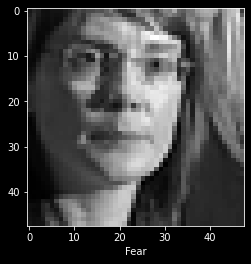

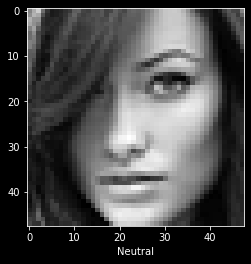

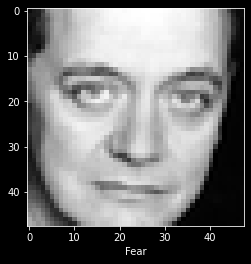

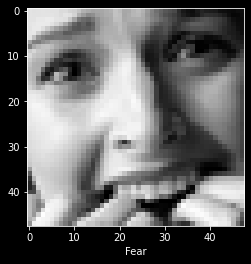

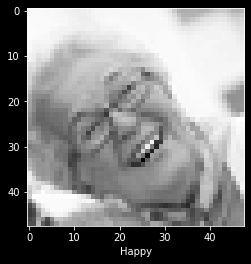

In [ ]:
#Plotting five different images with their emotions name
for i in range(5):
    r = np.random.randint((1), 24000, 1)[0]
    plt.figure()
    plt.imshow(X[r].reshape(48,48), cmap='gray')
    plt.xlabel(label_map[y_o[r]])

In [ ]:
X = X.reshape(len(X), 48, 48, 1)

In [ ]:
#No_of_images, height, width, coloar_map

In [ ]:
X.shape

(24006, 48, 48, 1)

In [ ]:
from tensorflow.keras.utils import to_categorical
y_new = to_categorical(y_o, num_classes=6)

In [ ]:
len(y_o), y_new.shape

(24006, (24006, 6))

In [ ]:
y_o[150], y_new[150]

(0, array([1., 0., 0., 0., 0., 0.], dtype=float32))

#**Making Training and Validation Data**

In [ ]:
#Importing libraries for creating model
from keras.models import Sequential
from keras.layers import Dense , Activation , Dropout ,Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.metrics import categorical_accuracy
from keras.models import model_from_json
from keras.callbacks import ModelCheckpoint
from keras.optimizers import *
from tensorflow.keras.layers import BatchNormalization

In [ ]:
#Adding convolutional layers with activation functions (relu) and max pooling
model = Sequential()


input_shape = (48,48,1)


model.add(Conv2D(64, (5, 5), input_shape=input_shape,activation='relu', padding='same'))
model.add(Conv2D(64, (5, 5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(128, (5, 5),activation='relu',padding='same'))
model.add(Conv2D(128, (5, 5),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3),activation='relu',padding='same'))
model.add(Conv2D(256, (3, 3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

## (15, 15) --->  30
model.add(Flatten())
model.add(Dense(6, activation='softmax'))

model.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer='adam')

In [ ]:
#Printing model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 48, 48, 64)        1664      
                                                                 
 conv2d_7 (Conv2D)           (None, 48, 48, 64)        102464    
                                                                 
 batch_normalization_3 (Batc  (None, 48, 48, 64)       256       
 hNormalization)                                                 
                                                                 
 activation_2 (Activation)   (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 24, 24, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 24, 24, 128)      

#**Fitting the Model with Training and Validation Data**

In [ ]:
#Running epochs 
history = model.fit(X, y_new, epochs=25, batch_size=64, shuffle=True, validation_split=0.2)

Epoch 1/25
301/301 [==============================] - 26s 83ms/step - loss: 2.3480 - accuracy: 0.2280 - val_loss: 1.8805 - val_accuracy: 0.3055
Epoch 2/25
301/301 [==============================] - 25s 81ms/step - loss: 1.9267 - accuracy: 0.2911 - val_loss: 2.2350 - val_accuracy: 0.2362
Epoch 3/25
301/301 [==============================] - 24s 81ms/step - loss: 1.5824 - accuracy: 0.3780 - val_loss: 2.6467 - val_accuracy: 0.1751
Epoch 4/25
301/301 [==============================] - 25s 84ms/step - loss: 1.4558 - accuracy: 0.4299 - val_loss: 1.8309 - val_accuracy: 0.2824
Epoch 5/25
301/301 [==============================] - 24s 81ms/step - loss: 1.3523 - accuracy: 0.4698 - val_loss: 1.9728 - val_accuracy: 0.3176
Epoch 6/25
301/301 [==============================] - 25s 84ms/step - loss: 1.2850 - accuracy: 0.5022 - val_loss: 1.5502 - val_accuracy: 0.4456
Epoch 7/25
301/301 [==============================] - 24s 81ms/step - loss: 1.2072 - accuracy: 0.5327 - val_loss: 1.5135 - val_accuracy:

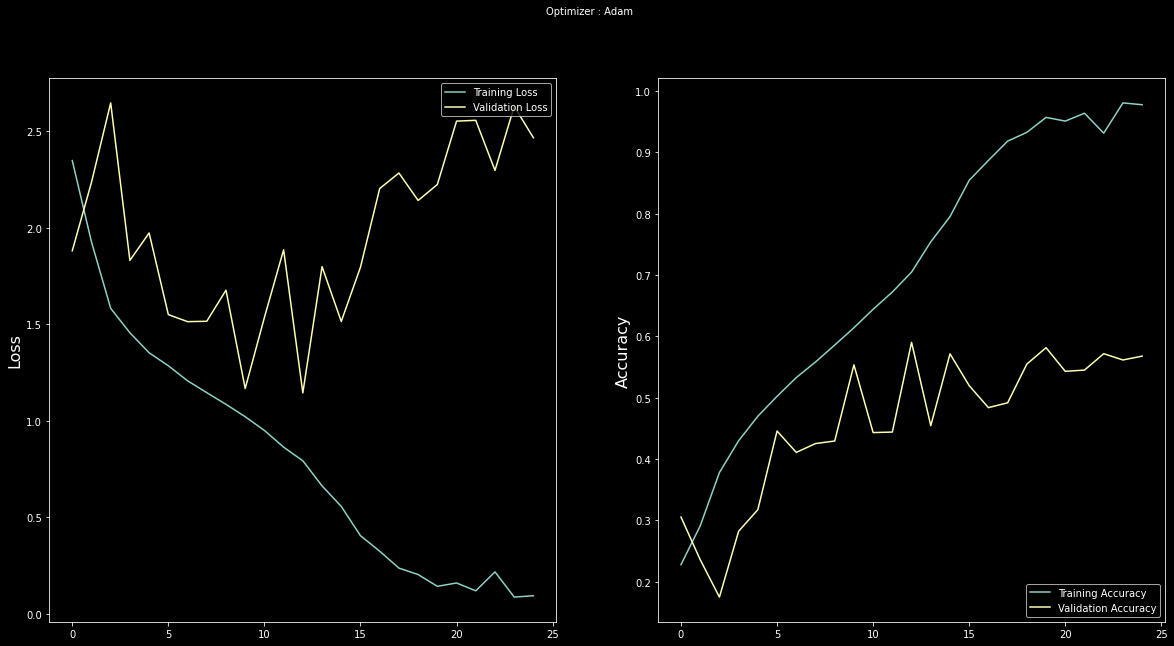

In [ ]:
#Plotting losses and accuracy of train and validation
plt.style.use('dark_background')

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [ ]:
#Saving the model as a .h5 file
model.save('model_final.h5')

In [ ]:
model.save('model_final.json')

INFO:tensorflow:Assets written to: model_final.json/assets


In [ ]:
from keras.models import load_model
model = load_model('model_final.h5')

In [ ]:
model_json = model.to_json()
with open("model1.json","w") as json_file:
     json_file.write(model_json)


In [ ]:
from google.colab import files
files.download('model_final.json')

#**Testing by importing new images** 

In [ ]:
#Testing with different images
import cv2
test_img = cv2.imread('/content/drive/MyDrive/files/surprise.jfif', 0)

In [ ]:
test_img.shape

(168, 300)

In [ ]:
test_img = cv2.resize(test_img, (48,48))
test_img.shape

(48, 48)

In [ ]:
test_img = test_img.reshape(1,48,48,1)

In [ ]:
#Surprise face predicting
model.predict(test_img)

array([[0., 0., 0., 0., 1., 0.]], dtype=float32)

label_map = ['Anger', 'Fear', 'Sad', 'Happy', 'Surprise', 'Neutral']

Actual image is suprise and prediction is also surprise

In [ ]:
#Pedicting emotion with image
test_img2 = cv2.imread("/content/drive/MyDrive/files/neutral.jfif",0)

In [ ]:
test_img2.shape

(183, 275)

In [ ]:
test_img2 = cv2.resize(test_img2, (48,48))
test_img2.shape

(48, 48)

In [ ]:
test_img2 = test_img2.reshape(1,48,48,1)

In [ ]:
#Neutral face predicting
model.predict(test_img2)

array([[0., 0., 0., 0., 0., 1.]], dtype=float32)

label_map = ['Anger', 'Fear', 'Sad', 'Happy', 'Surprise', 'Neutral']

Actual image is neutral and prediction is also neutral

#**Conclusion**

1. Trained the model using Convolutional Neural Network (CNN) we just added layers with a channels and padding requirement in a sequential model just by calling add method.
2. Haarcasacade is the package used from OpenCV to detect objects in other images. Initially the video frame is stored in the video object.
3. The epochs as 25 and the optimum score is at 10th epoch.
4. Trained the model with several images and then used the test images to see how the results match up.
5. The accuracy that achieved for the validation set is 56%  for further increase the accuracy of the model, we can either expand the training dataset or we have to increase the batch size for the model. Through these parameters, we can increase the model accuracy.
6. Model is identifying students emotions using minimum reference images and Successfully  deployed web app of real-time webcam video feed on Heroku and streamlit platform.


